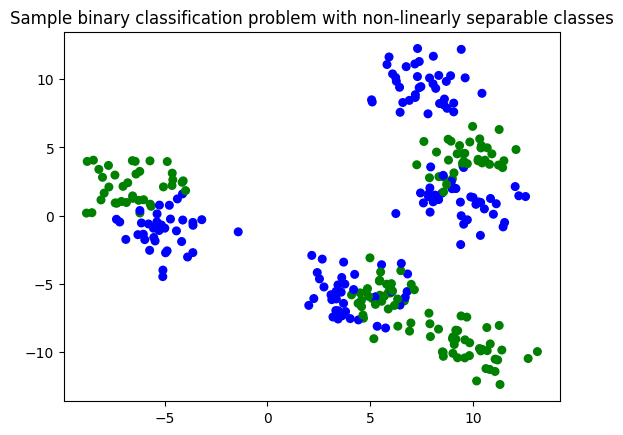

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

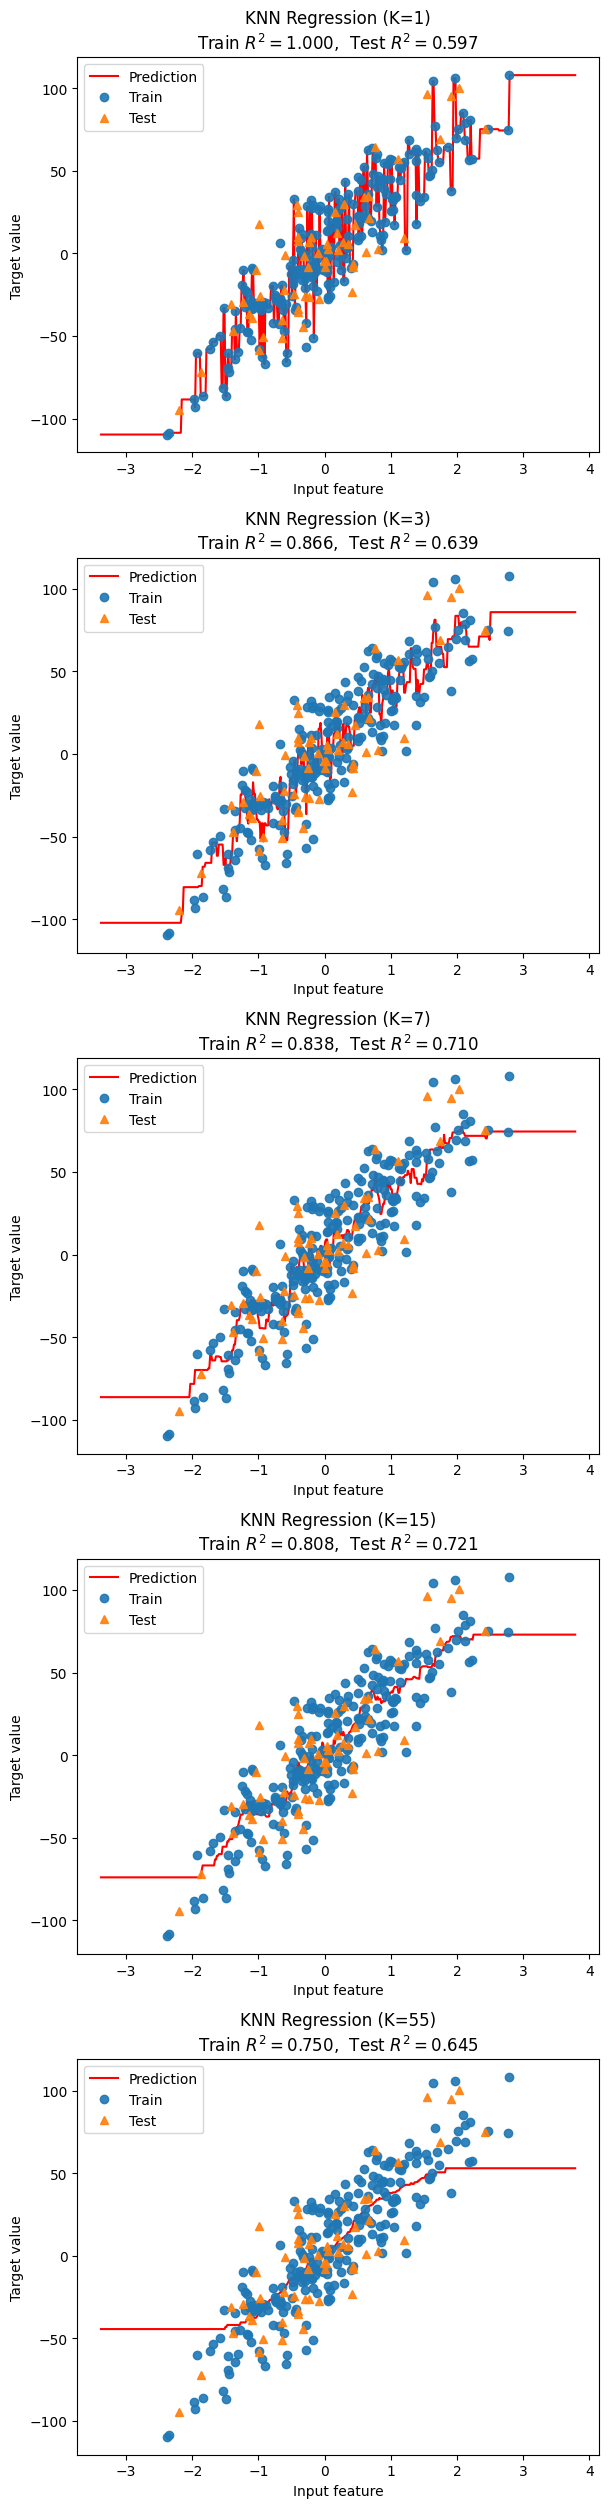

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X, y = make_regression(n_samples=300, n_features=1, noise=20, random_state=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)
X_predict_input = np.linspace(X.min() - 1, X.max() + 1, 500).reshape(-1, 1)
fig, subaxes = plt.subplots(5, 1, figsize=(6, 25))

k_values = [1, 3, 7, 15, 55]

for thisaxis, K in zip(subaxes, k_values):
    knnreg = KNeighborsRegressor(n_neighbors=K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    
    thisaxis.plot(X_predict_input, y_predict_output, color='red', label='Prediction')
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\nTrain $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'.format(K, train_score, test_score))
    thisaxis.legend()

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r2_train_scores = []
r2_test_scores = []

for K in k_values:
    knnreg = KNeighborsRegressor(n_neighbors=K).fit(X_train, y_train)
    y_pred_train = knnreg.predict(X_train)
    y_pred_test = knnreg.predict(X_test)
    
    r2_train_scores.append(r2_score(y_train, y_pred_train))
    r2_test_scores.append(r2_score(y_test, y_pred_test))

best_index = np.argmax(r2_test_scores)
best_k = k_values[best_index]
best_r2 = r2_test_scores[best_index]

print('Best K: {} with Test R² Score: {:.3f}'.format(best_k, best_r2))


Best K: 15 with Test R² Score: 0.721
